In [4]:
import os
print('Jupyter的路径是:',os.path.abspath('.'))

PATH = 'E:\\Stock\\'

if not os.path.exists(PATH): os.makedirs(PATH)
else:print('存放路径是: %s'%PATH)

Jupyter的路径是: C:\Users\Murphy
存放路径是: E:\Stock\


In [7]:
#基础数据获取
import tushare as ts
import pandas as pd
import datetime
now_time = datetime.datetime.now().strftime('%Y%m%d')
ts.set_token('#############################################')##Tushare 密码
print('现在时间是:%s'%now_time)
pro = ts.pro_api()
# 读取Tushare的版本
vs = ts.__version__
print('当前tushare版本号为：%s'%vs)
#获取对应股票代码(xxxxxx.SH)

code='002702'
print('获取股票 %s 日线数据中...'%(code))
df = pro.daily(ts_code=code+'.SZ', start_date='20180101', end_date='20210101')
pd.DataFrame.to_csv(df,PATH+'stock_'+code+'.SZ.csv')

现在时间是:20210601
当前tushare版本号为：1.2.62
获取股票 002702 日线数据中...


In [101]:
#指数获取
import tushare as ts
import pandas as pd
pro = ts.pro_api()
#读取Tushare的版本
vs = ts.__version__
print('当前tushare版本号为：%s'%vs)
print('获取上证指数日线数据中...')

#获取上证指数的数据
df = pro.index_daily(ts_code='000001.SH', start_date='20200101', end_date='20210402')
pd.DataFrame.to_csv(df,PATH+'index_SSE.csv')

当前tushare版本号为：1.2.62
获取上证指数日线数据中...


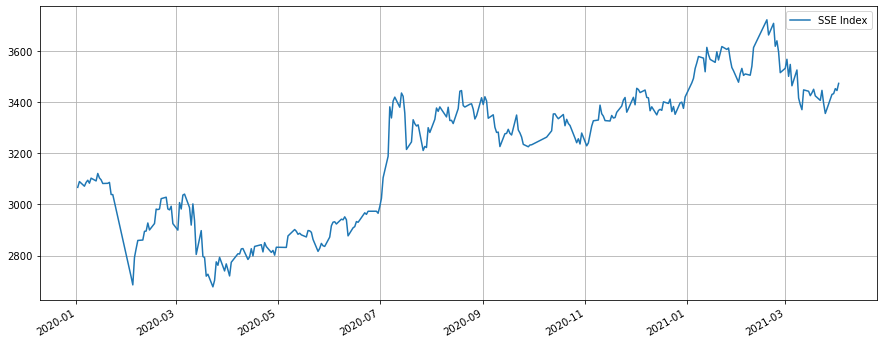

In [11]:
#数据画图展示
from datetime import datetime
df_base = pd.read_csv(PATH+'index_SSE.csv',header=0,parse_dates=["trade_date"], 
                 date_parser=lambda x: datetime.strptime(x, "%Y%m%d"))

sse = pd.Series(np.array(df_base['open']),index = df_base["trade_date"])
fig = plt.figure(figsize=(15,6))
sse.plot(label="SSE Index")
plt.xlabel("")
plt.grid()
plt.legend()
plt.savefig('E:\Stock\stock_sse.svg')
plt.show()

In [81]:
#数据处理(默认未停牌)
import csv
from pandas.core.frame import DataFrame
import pandas as pd
import numpy as np

tmp_lst = []
with open(PATH+'stock_002702.SZ.csv', 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        tmp_lst.append(row)
df = pd.DataFrame(tmp_lst[1:], columns=tmp_lst[0]) 
tmp_lst = []
with open(PATH+'index_SSE.csv', 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        tmp_lst.append(row)
df_SSE = pd.DataFrame(tmp_lst[1:], columns=tmp_lst[0]) 

#删除无用列(索引)
df.drop(df.columns[0:3], axis=1,inplace=True) 
df.drop(df.columns[4:5], axis=1,inplace=True) 

#插入预测数值-开盘价
tmp_arr = df['open'].head(len(df)-1).tolist()
tmp_arr = np.array(tmp_arr, dtype=np.float64) #
tmp_arr = np.hstack([np.mean(tmp_arr), tmp_arr])
df.insert(0, 'next_open', tmp_arr)

#删除无用列(索引)-SSE
x = df_SSE['open'][0]

df_SSE.drop(df_SSE.columns[0:3], axis=1,inplace=True) 
df_SSE.drop(df_SSE.columns[4:7], axis=1,inplace=True) 

#插入预测数值-开盘价-SSE
tmp_arr2 = df_SSE['open'].head(len(df_SSE)-1).tolist()
tmp_arr2 = np.array(tmp_arr2, dtype=np.float64) #
tmp_arr2 = np.hstack([x, tmp_arr2])
df_SSE.insert(0, 'next_open', tmp_arr2)

#数据导出
pd.DataFrame.to_csv(df,PATH+'demo_data.csv')
pd.DataFrame.to_csv(df_SSE,PATH+'demo_data_SSE.csv')
print('数据处理完成')

数据处理完成


In [82]:
#数据处理(反向)
import csv
from pandas.core.frame import DataFrame
import pandas as pd
import numpy as np

tmp_lst = []
with open(PATH+'demo_data_SSE.csv', 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        tmp_lst.insert(0,row)
#print(tmp_lst)
df = pd.DataFrame(tmp_lst)
df.drop(df.columns[0:1], axis=1,inplace=True)
df = df[:-1]

#删除最后一天的数据
df = df.head(len(df)-1)

#数据导出
pd.DataFrame.to_csv(df,PATH+'demo_data_t.csv')
print('数据处理完成')

数据处理完成


[[0, 1, 2, 3, 4, 5, 6], [7, 8, 9, 10, 11, 12, 13], [14, 15, 16, 17, 18, 19], [20, 21, 22, 23, 24, 25], [26, 27, 28, 29, 30, 31], [32, 33, 34, 35, 36, 37], [38, 39, 40, 41, 42, 43], [44, 45, 46, 47, 48, 49], [50, 51, 52, 53, 54, 55], [56, 57, 58, 59, 60, 61], [62, 63, 64, 65, 66, 67], [68, 69, 70, 71, 72, 73], [74, 75, 76, 77, 78, 79], [80, 81, 82, 83, 84, 85], [86, 87, 88, 89, 90, 91], [92, 93, 94, 95, 96, 97], [98, 99, 100, 101, 102, 103], [104, 105, 106, 107, 108, 109], [110, 111, 112, 113, 114, 115], [116, 117, 118, 119, 120, 121], [122, 123, 124, 125, 126, 127], [128, 129, 130, 131, 132, 133], [134, 135, 136, 137, 138, 139], [140, 141, 142, 143, 144, 145], [146, 147, 148, 149, 150, 151], [152, 153, 154, 155, 156, 157], [158, 159, 160, 161, 162, 163], [164, 165, 166, 167, 168, 169], [170, 171, 172, 173, 174, 175], [176, 177, 178, 179, 180, 181], [182, 183, 184, 185, 186, 187], [188, 189, 190, 191, 192, 193], [194, 195, 196, 197, 198, 199], [200, 201, 202, 203, 204, 205], [206, 207, 

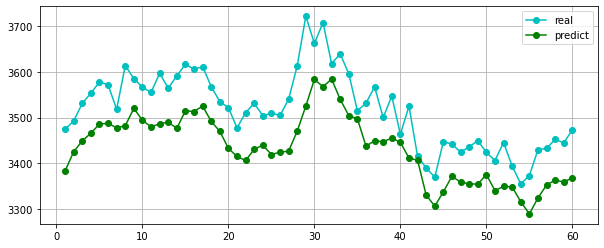

总计花费 21.911807537078857 秒


In [8]:
#SVR预测
import csv
import time
from pandas.core.frame import DataFrame
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import KFold
#时间计算
from sklearn.metrics import mean_squared_error #MSE
from sklearn.metrics import mean_absolute_error #MAE
from sklearn.metrics import r2_score#R2

####==============================初始值设定=======================================####

#网格搜索-初始值设定
G = [0.001,0.01,0.1,1,10,100,1000]
C = G  # 初始网格搜索集合
K = 40 #交叉验证折数
gap = 4 #间隔交叉验证间隔大小
n = 100 #多次网格循环次数
kind = 'KF'#交叉验证种类 KF LKF OKF GKF
mod = 'MAE'#交叉验证模型评估方式 RMSE MAE r2 MSE
period = 60 #预测时间长度

####==============================预建函数=========================================####

#顺序分割测试集和训练集 返回分割集合index
def orderSplit(x,y,k):
    n = math.floor(len(y)/k)
    u = len(y)%k
    index = []
    p, q = 0, n
    for i in range(k):
        ini_index = [i for i in range(p,q)]
        if u > 0:
            ini_index.append(q)
            p = p + 1
            q = q + 1
            u = u -1
        p = p + n
        q = q + n
        index.append(ini_index)
    return index

#由分割集合index 读取具体数据
def arr_input(x,y,train_index,test_index):
    _x_train,_x_test,_y_train,_y_test = [],[],[],[]
    for i in train_index:
        _x_train.append(x[i])
        _y_train.append(y[i])
    for i in test_index:
        _x_test.append(x[i])
        _y_test.append(y[i])
    return _x_train,_x_test,_y_train,_y_test

#模型评估
def ModelEvaluate(_y_test,_y_hat,mod):
    s = 0
    if mod == 'r2': s = r2_score(_y_test, _y_hat)
    elif mod == 'RMSE': s = np.sqrt(mean_squared_error(_y_test, _y_hat))
    elif mod == 'MSE': s = mean_squared_error(_y_test, _y_hat)
    elif mod == 'MAE': s = mean_absolute_error(_y_test, _y_hat)
    return s

#各种交叉验证
#顺序分割
def orderKF(x,y,index,clf,mod):
    front = math.floor(len(index)*0.3)#验证范围 >front
    _x_train,_x_test,_y_train,_y_test,scores = [],[],[],[],[]
    for i in range(front,len(index)-1):
        train_index,test_index = index[0:i],index[i:]
        train_index = sum(train_index,[])
        test_index = sum(test_index,[])
        _x_train,_x_test,_y_train,_y_test = arr_input(x,y,train_index,test_index)
        clf.fit(_x_train, _y_train)
        _y_hat = clf.predict(_x_test)
        s = ModelEvaluate(_y_test,_y_hat,mod)
        scores.append(s)       
    score = np.mean(scores)
    return score
#弃一分割
def leaveKF(x,y,index,clf,mod):
    front = math.floor(len(index)*0.3)#验证范围 >front
    _x_train,_x_test,_y_train,_y_test,scores = [],[],[],[],[]
    for i in range(front,len(index)):
        train_index,test_index = index[0:i],index[i]
        train_index = sum(train_index,[])
        _x_train,_x_test,_y_train,_y_test = arr_input(x,y,train_index,test_index)
        clf.fit(_x_train, _y_train)
        _y_hat = clf.predict(_x_test)
        s = ModelEvaluate(_y_test,_y_hat,mod)
        scores.append(s)       
    score = np.mean(scores)
    return score
#间隔分割
def gapKF(x,y,index,gap,clf,mod):
    front = math.floor(len(index)*0.3)#验证范围 >front
    _x_train,_x_test,_y_train,_y_test,scores = [],[],[],[],[]
    for i in range(front,len(index)-gap):
        train_index,test_index = index[0:i],index[(i+gap):]
        train_index = sum(train_index,[])
        test_index = sum(test_index,[])
        _x_train,_x_test,_y_train,_y_test = arr_input(x,y,train_index,test_index)
        clf.fit(_x_train, _y_train)
        _y_hat = clf.predict(_x_test)
        s = ModelEvaluate(_y_test,_y_hat,mod)
        scores.append(s)       
    score = np.mean(scores)
    return score
#普通K折
def KF(x,y,index,clf,mod):
    kf = KFold(n_splits=len(index),shuffle=False)
    _x_train,_x_test,_y_train,_y_test,scores = [],[],[],[],[]
    for train_index,test_index in kf.split(x,y):
        _x_train,_x_test,_y_train,_y_test = arr_input(x,y,train_index,test_index)
        clf.fit(_x_train, _y_train)
        _y_hat = clf.predict(_x_test)
        s = ModelEvaluate(_y_test,_y_hat,mod)
        scores.append(s)  
    score = np.mean(scores)
    return score

#网格搜索
def GridSearch(x,y,G,C,index,kind,gap,mod):
    if mod == 'r2': best_score,best_gamma,best_C = -1000.,0.,0.
    else: best_score,best_gamma,best_C = 1000.,0.,0.
    for g in G:
        for c in C:
            clf = SVR(kernel='rbf', gamma=g , C=c)#SVR采用高斯核
            if kind == 'KF': score = KF(x,y,index,clf,mod)
            elif kind == 'LKF': score = leaveKF(x,y,index,clf,mod)
            elif kind == 'OKF': score = orderKF(x,y,index,clf,mod)
            elif kind == 'GKF': score = gapKF(x,y,index,gap,clf,mod)
            if mod == 'r2':
                if score > best_score: best_score,best_gamma,best_C = score,g,c
            else:
                if score < best_score: best_score,best_gamma,best_C = score,g,c
    return best_score,best_gamma,best_C

def MultiGS(n,x,y,G,C,index,kind,gap,mod):
    best_score,best_gamma,best_C = -1000.,0.,0.
    last_gamma,last_C = 0.,0.
    for i in range(n):
        best_score,best_gamma,best_C = GridSearch(x,y,G,C,index,kind,gap,mod)
        print("Iteration:", i)
        print("Best AVG Sore:", best_score)
        print("Best Gamma:", best_gamma)
        print("Best C:", best_C)
        C = np.arange(best_C*0.5, best_C*1.51, best_C*0.1)
        G = np.arange(best_gamma*0.5, best_gamma*1.51, best_gamma*0.1)
        if math.isclose(last_gamma, best_gamma, rel_tol=1e-8) and math.isclose(last_C, best_C, rel_tol=1e-8):break
        last_gamma,last_C = best_gamma,best_C
    return best_gamma,best_C

####==============================算法正文==========================================####

#数据读取
tmp_lst = []
with open(PATH+'demo_data_t.csv', 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        tmp_lst.append(row)
data = np.array(tmp_lst[1:], dtype=np.float64) #直接转成矩阵

#数据归一化
df = pd.DataFrame(data)
df.drop(df.columns[0:1],axis=1,inplace=True)
rate = df.max() - df.min()
df_min = df.min()
df = (df-df.min())/(df.max() - df.min())
data = df.values


#顺序分割训练，测试集
y, x = np.split(data, (1,), axis=1)
y = y.ravel()
x_train,x_test = np.array_split(x, (len(y)-period,))
y_train,y_test = np.array_split(y, (len(y)-period,))


index = orderSplit(x_train,y_train,K)#40折交叉验证
print(index)

start = time.time()
best_gamma,best_C = MultiGS(n,x_train,y_train,G,C,index,kind,gap,mod)#多次网格验证
end = time.time()

#实际检验SVR回归
print("============================================")
print("Used Kind:", kind,'+',mod,'+',K)
print("Used Gamma:", best_gamma)
print("Used C:", best_C)
if kind == 'GKF': print('Gap:',gap)
clf = SVR(kernel='rbf', gamma=best_gamma ,C=best_C)
clf.fit(x_train, y_train)
y_hat = clf.predict(x_test)

#模型评估指标
print("Atcual r2:", r2_score(y_test, y_hat))
print("MAE:",mean_absolute_error(y_test,y_hat))#MAP
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_hat)))#RMSE

#实际股价还原
for i in range(0,len(y_hat)):
    y_hat[i] = y_hat[i]*rate[1]+df_min[1]
    y_test[i] = y_test[i]*rate[1]+df_min[1]
#print('rate:',rate)

####==============================作图分析==========================================####
#画图
#print(y_test)
#print(y_hat)
r = len(x_test) + 1
fig = plt.figure(figsize=(10,4))
#ax1 = fig.add_subplot(2,1,1) # 画2行1列个图形的第1个
#ax2 = fig.add_subplot(2,1,2)
plt.plot(np.arange(1,r), y_test, 'co-', label="real")
plt.plot(np.arange(1,r), y_hat, 'go-', label="predict")
plt.grid()
plt.legend()
plt.show()

#时间计算
print('总计花费 %s 秒'%(end-start))

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
### Lasso ###
Coefficient: [ 9.96830602e-01 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -5.11560844e-03 -4.65965771e-05]
Intercept: -0.01909861029263621
MSE: 0.0004064310273308237
MAE: 0.0004064310273308237


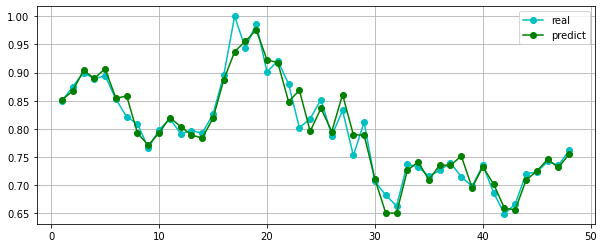

In [9]:
#LASSO预测
import csv
import time
from pandas.core.frame import DataFrame
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import KFold
#时间计算
from sklearn.metrics import mean_squared_error #MSE
from sklearn.metrics import mean_absolute_error #MAE
from sklearn.metrics import r2_score#R 2
from sklearn.linear_model import Lasso
#数据读取
tmp_lst = []
with open('E:\Stock\demo_data_t.csv', 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        tmp_lst.append(row)
data = np.array(tmp_lst[1:], dtype=np.float64) #直接转成矩阵

#数据归一化
df = pd.DataFrame(data)
df.drop(df.columns[0:1], axis=1,inplace=True)
rate = df.max() - df.min()
df_min = df.min()
df = (df-df.min())/(df.max() - df.min())
data = df.values

#顺序分割训练，测试集
y, x = np.split(data, (1,), axis=1)
y = y.ravel()
x_train,x_test = np.array_split(x, (len(y)-48,))
y_train,y_test = np.array_split(y, (len(y)-48,))

####==============================预建函数=========================================####

#顺序分割测试集和训练集 返回分割集合index
def orderSplit(x,y,k):
    n = math.floor(len(y)/k)
    u = len(y)%k
    index = []
    p, q = 0, n
    for i in range(k):
        ini_index = [i for i in range(p,q)]
        if u > 0:
            ini_index.append(q)
            p = p + 1
            q = q + 1
            u = u -1
        p = p + n
        q = q + n
        index.append(ini_index)
    return index

#由分割集合index 读取具体数据
def arr_input(x,y,train_index,test_index):
    _x_train,_x_test,_y_train,_y_test = [],[],[],[]
    for i in train_index:
        _x_train.append(x[i])
        _y_train.append(y[i])
    for i in test_index:
        _x_test.append(x[i])
        _y_test.append(y[i])
    return _x_train,_x_test,_y_train,_y_test

#模型评估
def ModelEvaluate(_y_test,_y_hat,mod):
    s = 0
    if mod == 'r2': s = r2_score(_y_test, _y_hat)
    elif mod == 'RMSE': s = np.sqrt(mean_squared_error(_y_test, _y_hat))
    elif mod == 'MSE': s = mean_squared_error(_y_test, _y_hat)
    elif mod == 'MAE': s = mean_absolute_error(_y_test, _y_hat)
    return s

#各种交叉验证
#顺序分割
def orderKF(x,y,index,clf):
    front = math.floor(len(index)*0.3)#验证范围 >front
    _x_train,_x_test,_y_train,_y_test,scores = [],[],[],[],[]
    for i in range(front,len(index)-1):
        train_index,test_index = index[0:i],index[i:]
        train_index = sum(train_index,[])
        test_index = sum(test_index,[])
        _x_train,_x_test,_y_train,_y_test = arr_input(x,y,train_index,test_index)
        clf.fit(_x_train, _y_train)
        _y_hat = clf.predict(_x_test)
        s = ModelEvaluate(_y_test,_y_hat,'MAE')
        scores.append(s)       
    score = np.mean(scores)
    return score

#网格搜索
def GridSearch(x,y,A,index,kind):
    best_score,best_a = 1000.,0.
    for a in A:
        clf = Lasso(alpha = a)#SVR采用高斯核
        score = orderKF(x,y,index,clf)
        if score < best_score: best_score,best_a = score,a      
    return best_score,best_a

def MultiGS(n,x,y,A,index,kind):
    best_score,best_a = -1000.,0.
    last_a = 0.,0.
    for i in range(n):
        best_score,best_a = GridSearch(x,y,A,index,kind)
        print("Iteration:", i)
        #print("Best AVG Sore:", best_score)
        #print("Best Gamma:", best_gamma)
        #print("Best C:", best_C)
        A = np.arange(best_a*0.5, best_a*1.51, best_a*0.1)
        if last_a == best_a: break
        last_a = best_a
    return best_a


#网格搜索-初始值设定
A = [0.001,0.01,0.1,1,10,100,1000]
index = orderSplit(x,y,40)#40折交叉验证
n = 10
kind = 'OKF'#交叉验证种类 KF LKF OKF GKF
best_a = 0

start = time.time()
best_a = MultiGS(n,x,y,A,index,kind)#多次网格验证
end = time.time()


print('### Lasso ###')
lasso = Lasso(alpha = best_a)
lasso_pre = lasso.fit(x_train, y_train).predict(x_test)
print('Coefficient:', lasso.coef_)
print('Intercept:', lasso.intercept_)
print('MSE:', mean_squared_error(y_test, lasso_pre))
print('MAE:', mean_squared_error(y_test, lasso_pre))

#实际股价还原

####==============================作图分析==========================================####
#画图
r = len(x_test) + 1
fig = plt.figure(figsize=(10,4))
plt.plot(np.arange(1,r), y_test, 'co-', label="real")
plt.plot(np.arange(1,r), lasso_pre, 'go-', label="predict")
plt.grid()
plt.legend()
plt.show()